#### Modelling using Resnet18

In [1]:
from src.cv.pytorch.datasets.facial_keypoint_detection.dataset import FacialKeypointDataset
from src.cv.model_pipelines.facial_keypoint_resnet_pipeline import FacialResnetTrainingPipeline

In [2]:
fkd = FacialKeypointDataset(
    dataset_name="faces", 
    data_type = "csv",
    data_file=r"data/facial-keypoints-detection/training.csv",
    resize_size=96,
    is_test=False
)

In [3]:
model_training_config = dict(
    learning_rate=0.09,
    batch_size=250,
    epochs=20,
    batch_norm_momentum=0.5
)
model_data_config = dict(
     dataset_size=len(fkd), train_data_pct=0.8, model_save_path="C:\\Users\\sankr\\Documents\\projects\\git_work\\experiments_cv_nlp\\data\\facial-keypoint-detection"
)

In [7]:
model_initialization_params=dict(
    batch_norm_epsilon=1e-05, 
    batch_norm_momentum=model_training_config["batch_norm_momentum"],
    input_shape=1,
    number_of_classes=30,
    resnet_type= "resnet_18",
    use_leaky_relu_in_resnet = True,
    alpha_leaky_relu = 0.01,
    per_block_starting_stride=[1, 2, 2, 2]
)

In [9]:
facial_keypoint_pipeline = FacialResnetTrainingPipeline(
    dataset=fkd,
    model_data_config=model_data_config,
    model_initialization_params=model_initialization_params,
    model_training_config = model_training_config,
#     load_model_from_path=r"C:\Users\sankr\Documents\projects\git_work\experiments_cv_nlp\data\facial-keypoints-detection\models\fck_resnet18.pkl"
)

In [10]:
print(facial_keypoint_pipeline.model)

Resnet(
  (maxPool2d1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2d1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (Resnet_18conv2Block): ResnetBlock(
    (BasicBlock2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    )
  )
  (Resnet_18conv3Block): ResnetBlock(
    (downsample): Sequential(
      (0): Conv2d(64, 128,

In [ ]:
facial_keypoint_pipeline.train()


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

root - INFO - Train Loss for epoch 0: 296.5056 - 06-Feb-23 22:53:00
root - INFO - Validation Loss for epoch 0: 16.3533 - 06-Feb-23 22:53:46


  5%|████▏                                                                              | 1/20 [01:39<31:32, 99.60s/it]

root - INFO - Train Loss for epoch 1: 16.2573 - 06-Feb-23 22:54:33
root - INFO - Validation Loss for epoch 1: 12.7653 - 06-Feb-23 22:55:18


 10%|████████▎                                                                          | 2/20 [03:11<28:33, 95.20s/it]

root - INFO - Train Loss for epoch 2: 11.0951 - 06-Feb-23 22:56:06
root - INFO - Validation Loss for epoch 2: 11.4722 - 06-Feb-23 22:56:45


 15%|████████████▍                                                                      | 3/20 [04:38<25:51, 91.26s/it]

root - INFO - Train Loss for epoch 3: 10.6094 - 06-Feb-23 22:57:18
root - INFO - Validation Loss for epoch 3: 11.4249 - 06-Feb-23 22:57:49


 20%|████████████████▌                                                                  | 4/20 [05:42<21:28, 80.55s/it]

root - INFO - Train Loss for epoch 4: 10.5517 - 06-Feb-23 22:58:22
root - INFO - Validation Loss for epoch 4: 11.4105 - 06-Feb-23 22:58:53


 25%|████████████████████▊                                                              | 5/20 [06:46<18:40, 74.73s/it]

root - INFO - Train Loss for epoch 5: 10.4607 - 06-Feb-23 22:59:28


In [8]:
facial_keypoint_pipeline.generate_train_validation_loss_curves()

In [9]:
facial_keypoint_pipeline.best_model

#### Generate Predictions

In [11]:
fkd_test = FacialKeypointDataset(
    dataset_name="faces", 
    data_type = "csv",
    data_file=r"data/facial-keypoints-detection/test.csv",
    resize_size=96,
    is_test=True

)

In [12]:
import torch
import numpy as np

In [13]:
test_dataloader = facial_keypoint_pipeline.generate_test_dataloader_from_dataset(fkd_test)

In [14]:
predictions = facial_keypoint_pipeline.get_predictions(test_dataloader)

In [15]:
from matplotlib import pyplot as plt
def visualize_test_data(image_data, predictions, n_cols=5):
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(20,12))
  
    for row in range(n_cols):
        sample_idx = np.random.choice(len(image_data))
        img = image_data[sample_idx]["image"].reshape(96,96)
        predicted = predictions[sample_idx]

        predicted = np.vstack(np.split(predicted, 15)).T
        axes[row].imshow(img, cmap='gray')
        axes[row].plot(predicted[0], predicted[1], 'o', color='green', label='predicted')
        axes[row].legend()


In [16]:
import pandas as pd
id_lookup = pd.read_csv("c:\\users\\sankr\\documents\\projects\\git_work\\experiments_cv_nlp\\data\\facial-keypoints-detection\\IdLookupTable.csv")
id_lookup_features = list(id_lookup['FeatureName'])
id_lookup_image = list(id_lookup['ImageId'])

for i in range(len(id_lookup_features)):
    id_lookup_features[i] = fkd.dataset.image_labels.columns.tolist().index(id_lookup_features[i])

location = []
for i in range(len(id_lookup_features)):
    location.append(predictions[id_lookup_image[i]-1][id_lookup_features[i]])

In [17]:
id_lookup['FeatureName']= location
submission = id_lookup[['RowId', 'FeatureName']]

In [18]:
submission.rename(columns={"FeatureName": "Location"}, inplace=True)

In [19]:
submissions_folder = "c:\\users\\sankr\\documents\\projects\\git_work\\experiments_cv_nlp\\data\\facial-keypoints-detection\\submissions"
import os

os.makedirs(submissions_folder, exist_ok=True)
submission_path = os.path.join(submissions_folder, "facial_keypoint_detections.csv")
submission.to_csv(submission_path, index=False)

In [20]:
from kaggle_utils.kaggle_cli_wrapper import KaggleScoringsApi

In [21]:
kaggle_scoring_api = KaggleScoringsApi(competition_name="facial-keypoints-detection")

In [22]:
kaggle_scoring_api.submit_solution(submissions_file=submission_path, description="facial_keypoint_vanilla_cnn")

In [23]:
kaggle_scoring_api.get_top_scores()

In [24]:
!kaggle competitions submissions -c "facial-keypoints-detection"

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

root - INFO - Train Loss for epoch 0: 283.2781 - 06-Feb-23 22:29:56
root - INFO - Validation Loss for epoch 0: 22.2167 - 06-Feb-23 22:30:22


  5%|████▏                                                                              | 1/20 [00:59<18:51, 59.55s/it]

root - INFO - Train Loss for epoch 1: 16.0673 - 06-Feb-23 22:30:48
root - INFO - Validation Loss for epoch 1: 12.1277 - 06-Feb-23 22:31:13


 10%|████████▎                                                                          | 2/20 [01:51<16:26, 54.81s/it]

root - INFO - Train Loss for epoch 2: 11.1671 - 06-Feb-23 22:31:38
root - INFO - Validation Loss for epoch 2: 11.4585 - 06-Feb-23 22:32:06


 15%|████████████▍                                                                      | 3/20 [02:44<15:19, 54.07s/it]

root - INFO - Train Loss for epoch 3: 10.7115 - 06-Feb-23 22:32:32
root - INFO - Validation Loss for epoch 3: 11.9417 - 06-Feb-23 22:33:01


 20%|████████████████▌                                                                  | 4/20 [03:38<14:27, 54.21s/it]

root - INFO - Train Loss for epoch 4: 10.6536 - 06-Feb-23 22:33:29
root - INFO - Validation Loss for epoch 4: 11.3967 - 06-Feb-23 22:33:58


 25%|████████████████████▊                                                              | 5/20 [04:35<13:48, 55.23s/it]

root - INFO - Train Loss for epoch 5: 10.5493 - 06-Feb-23 22:34:27
root - INFO - Validation Loss for epoch 5: 11.3159 - 06-Feb-23 22:34:54


 30%|████████████████████████▉                                                          | 6/20 [05:32<12:59, 55.65s/it]

root - INFO - Train Loss for epoch 6: 10.5372 - 06-Feb-23 22:35:23
root - INFO - Validation Loss for epoch 6: 11.2631 - 06-Feb-23 22:35:49


 35%|█████████████████████████████                                                      | 7/20 [06:27<12:01, 55.51s/it]

root - INFO - Train Loss for epoch 7: 10.5696 - 06-Feb-23 22:36:17
root - INFO - Validation Loss for epoch 7: 11.1907 - 06-Feb-23 22:36:43


 40%|█████████████████████████████████▏                                                 | 8/20 [07:20<10:57, 54.82s/it]

root - INFO - Train Loss for epoch 8: 10.6332 - 06-Feb-23 22:37:09
root - INFO - Validation Loss for epoch 8: 11.9065 - 06-Feb-23 22:37:36


 45%|█████████████████████████████████████▎                                             | 9/20 [08:14<09:58, 54.40s/it]

root - INFO - Train Loss for epoch 9: 10.9428 - 06-Feb-23 22:38:03
root - INFO - Validation Loss for epoch 9: 11.6643 - 06-Feb-23 22:38:28


 50%|█████████████████████████████████████████                                         | 10/20 [09:06<08:57, 53.75s/it]

root - INFO - Train Loss for epoch 10: 10.5339 - 06-Feb-23 22:38:52
root - INFO - Validation Loss for epoch 10: 11.8628 - 06-Feb-23 22:39:17


 55%|█████████████████████████████████████████████                                     | 11/20 [09:54<07:49, 52.12s/it]

root - INFO - Train Loss for epoch 11: 10.5325 - 06-Feb-23 22:39:49
root - INFO - Validation Loss for epoch 11: 12.6346 - 06-Feb-23 22:40:20


 60%|█████████████████████████████████████████████████▏                                | 12/20 [10:57<07:23, 55.42s/it]

root - INFO - Train Loss for epoch 12: 10.3572 - 06-Feb-23 22:40:52
root - INFO - Validation Loss for epoch 12: 10.9507 - 06-Feb-23 22:41:20


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [11:58<06:38, 56.91s/it]

root - INFO - Train Loss for epoch 13: 10.3257 - 06-Feb-23 22:41:48
root - INFO - Validation Loss for epoch 13: 10.7521 - 06-Feb-23 22:42:18


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [12:55<05:42, 57.06s/it]

root - INFO - Train Loss for epoch 14: 10.3718 - 06-Feb-23 22:42:53
root - INFO - Validation Loss for epoch 14: 10.9933 - 06-Feb-23 22:43:32


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [14:09<05:11, 62.24s/it]

root - INFO - Train Loss for epoch 15: 10.1940 - 06-Feb-23 22:44:17
root - INFO - Validation Loss for epoch 15: 10.7975 - 06-Feb-23 22:45:01


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [15:38<04:41, 70.30s/it]

root - INFO - Train Loss for epoch 16: 10.8952 - 06-Feb-23 22:45:44
root - INFO - Validation Loss for epoch 16: 12.5508 - 06-Feb-23 22:46:11


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [16:49<03:30, 70.24s/it]

root - INFO - Train Loss for epoch 17: 10.3554 - 06-Feb-23 22:46:37
root - INFO - Validation Loss for epoch 17: 12.0896 - 06-Feb-23 22:47:03


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [17:40<02:09, 64.66s/it]

root - INFO - Train Loss for epoch 18: 10.3148 - 06-Feb-23 22:47:30
root - INFO - Validation Loss for epoch 18: 10.7292 - 06-Feb-23 22:47:55


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [18:33<01:01, 61.06s/it]

root - INFO - Train Loss for epoch 19: 10.0224 - 06-Feb-23 22:48:22
root - INFO - Validation Loss for epoch 19: 11.4723 - 06-Feb-23 22:48:48


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [19:25<00:00, 58.29s/it]


Resnet(
  (maxPool2d1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2d1): Sequential(
    (0): Conv2d(96, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (Resnet_18conv2Block): ResnetBlock(
    (BasicBlock2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    )
  )
  (Resnet_18conv3Block): ResnetBlock(
    (downsample): Sequential(
      (0): Conv2d(64, 128

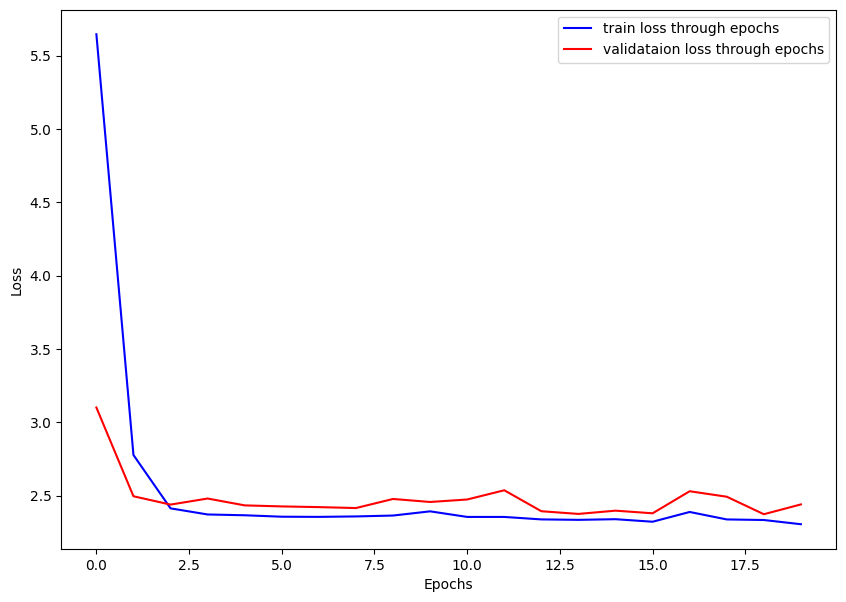

In [26]:
plt.figure(figsize=(10, 7))
plt.plot(np.log(train_loss), color='blue', label='train loss through epochs')
plt.plot(np.log(validation_loss), color='red', label='validataion loss through epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()